In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Download 'diabetes' dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
diabetes_X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [3]:
# We use one feature (simple linear regression)
diabetes_X = diabetes_X[:, np.newaxis, 2]   #np.newaxis adds a dimension to the existing matrix 
#Note : Matrix[:, np.newaxis] adds a vertical dimension while Matrix [np.newaxis, :] adds a horizontal dimension 
diabetes_X

array([[ 0.06169621],
       [-0.05147406],
       [ 0.04445121],
       [-0.01159501],
       [-0.03638469],
       [-0.04069594],
       [-0.04716281],
       [-0.00189471],
       [ 0.06169621],
       [ 0.03906215],
       [-0.08380842],
       [ 0.01750591],
       [-0.02884001],
       [-0.00189471],
       [-0.02560657],
       [-0.01806189],
       [ 0.04229559],
       [ 0.01211685],
       [-0.0105172 ],
       [-0.01806189],
       [-0.05686312],
       [-0.02237314],
       [-0.00405033],
       [ 0.06061839],
       [ 0.03582872],
       [-0.01267283],
       [-0.07734155],
       [ 0.05954058],
       [-0.02129532],
       [-0.00620595],
       [ 0.04445121],
       [-0.06548562],
       [ 0.12528712],
       [-0.05039625],
       [-0.06332999],
       [-0.03099563],
       [ 0.02289497],
       [ 0.01103904],
       [ 0.07139652],
       [ 0.01427248],
       [-0.00836158],
       [-0.06764124],
       [-0.0105172 ],
       [-0.02345095],
       [ 0.06816308],
       [-0

In [4]:
# Divide the dataset to train and test
diabetes_X_train = diabetes_X[:-20]   #all except the last 20
diabetes_X_test = diabetes_X[-20:]   #the last 20 

In [5]:
# Divide the target values to train and test
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]
diabetes_X_train.shape

(422, 1)

In [6]:
# Create a linear regression object
regression_object = linear_model.LinearRegression()

In [7]:
# Train 
regression_object.fit(diabetes_X_train, diabetes_y_train)

LinearRegression()

In [8]:
# Predict with the test database
diabetes_y_pred = regression_object.predict(diabetes_X_test)

In [9]:
# Print the coefficients
print('Coefficients: \n', regression_object.coef_)   #b1

Coefficients: 
 [938.23786125]


In [10]:
#Print the intercept
print('Intercept: \n', regression_object.intercept_)   #b0

Intercept: 
 152.91886182616167


In [11]:
#mean squared error
print('Mean squared error: {:.2f}'.format(mean_squared_error(diabetes_y_test, diabetes_y_pred)))

# Coefficient of determination (R2): 1 is perfect prediction
R2 = r2_score(diabetes_y_test, diabetes_y_pred)
print('Coefficient of determination: {:.2f}'.format(R2))

#Adjusted R squared :
n = len(diabetes_X)  #total number of data points
p = diabetes_X_train.shape[1]   #number of independent variables (x1, x2, ...)
Adj_r2 = 1-(1-R2)*(n-1)/(n-p-1)
print(Adj_r2)

Mean squared error: 2548.07
Coefficient of determination: 0.47
0.47137675581859484


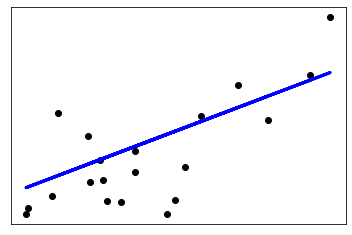

In [12]:
# Trace the results
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()